# Trabajo Práctico 3

Alumna: Sofía Speri

## Ecosistema actual, Huggingface y modelos pre entrenados.

---

# Modelos:

## 1. [Swin Transformer](https://huggingface.co/docs/transformers/model_doc/swin)
- **Tipo:** Transformer jerárquico.
- **Características:**
  - Utiliza ventanas deslizantes (windowed attention) para atención local.
  - Crea representaciones jerárquicas a partir de imágenes.
  - Mejora la escalabilidad en procesamiento de imágenes de alta resolución.

## 2. [Convolutional Vision Transformer (CvT)](https://huggingface.co/docs/transformers/model_doc/cvt)
- **Tipo:** Híbrido CNN y Transformer.
- **Características:**
  - Aplica convoluciones iniciales para captura de características locales.
  - Utiliza bloques de Transformer para modelar relaciones globales.
  - Eficiente en tareas de visión con reducción de complejidad computacional.

## 3. [MobileViT](https://huggingface.co/docs/transformers/model_doc/mobilevit)
- **Tipo:** Arquitectura eficiente para dispositivos móviles.
- **Características:**
  - Integra convoluciones y Transformers de forma modular.
  - Diseñada para balancear rendimiento y eficiencia en recursos limitados.
  - Optimizada para aplicaciones en tiempo real.

## 4. [Pyramid Vision Transformer](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/pvt#transformers.PvtForImageClassification)
- **Tipo:** Transformer con enfoque en múltiples escalas.
- **Características:**
  - Implementa arquitectura en pirámide para procesamiento de imágenes.
  - Captura información a diferentes resoluciones, mejorando la generalización.
  - Eficaz en la detección de características tanto finas como gruesas.


## 5. [Masked Autoencoder](https://huggingface.co/docs/transformers/v4.45.2/en/model_doc/vit_mae#vitmae)
- **Tipo:** Autoencoder con enmascaramiento.
- **Características:**
  - Enmascara partes de la imagen durante el entrenamiento para aprendizaje de características.
  - Similar al enmascaramiento en modelos de lenguaje como BERT.
  - Facilita la transferencia de conocimiento para tareas de preentrenamiento y finetuning.

---
---

# Guía para Trabajar con Modelos Preentrenados de Imágenes en Hugging Face con PyTorch



## 1. Preprocesamiento de los Datos

- **Redimensionamiento y normalización**: La clase `ImageProcessor` ajusta automáticamente la imagen a las dimensiones que el modelo necesita.

    ```python
    from transformers import AutoImageProcessor
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    inputs = processor(images=image, return_tensors="pt")
    ```

- **Augmentación de datos**: Puedes usar librerías como `torchvision` para agregar augmentación de datos y mejorar el rendimiento del modelo.

    ```python
    import torchvision.transforms as transforms
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ])
    ```
---

## 2. Trabajando con Modelos Preentrenados de Imágenes

### Pasos para usar modelos preentrenados:

1. **Instalación de librerías**: Hace falta tener instalada la librería `transformers` de Hugging Face, ya que ofrece acceso a modelos preentrenados y procesadores para el preprocesamiento de datos.

2. **Cargar el modelo y el procesador**: Se utiliza `AutoImageProcessor` para cargar el procesador que realizará el preprocesamiento de las imágenes (ajustes de tamaño, normalización, etc.), y por ejemplo `AutoModelForImageClassification` para cargar el modelo de clasificación preentrenado.

    ```python
    from transformers import AutoImageProcessor, AutoModelForImageClassification
    processor = AutoImageProcessor.from_pretrained("google/vit-base-patch16-224")
    model = AutoModelForImageClassification.from_pretrained("google/vit-base-patch16-224")
    ```

3. **Preprocesar las imágenes**: Se utiliza el procesador para convertir la imagen en un formato adecuado (tensor), que luego puede ser alimentado al modelo.

4. **Inferencia y uso de logits**: Los logits son los valores sin normalizar que el modelo genera para cada clase de salida. En una tarea de clasificación, estos logits indican qué tan seguro está el modelo de que una imagen pertenece a una clase específica. El índice del logit maximo corresponde a la clase predicha.

    **Ejemplo de uso de logits**:
    ```python
    inputs = processor(images=image, return_tensors="pt")  
    outputs = model(**inputs)  
    logits = outputs.logits
    ```

5. **Interpretar los logits**:  Para obtener la clase predicha, se toma el índice del logit más alto y se asocia con la etiqueta de la clase correspondiente.


    ```python
    predicted_class_idx = logits.argmax(-1).item()
     print(f"Predicción de clase: {model.config.id2label[predicted_class_idx]}")
    ```


---

## 3. Finetuning

El **finetuning** ajusta un modelo preentrenado para tareas específicas utilizando un conjunto de datos más pequeño. Esto se logra actualizando los pesos de las últimas capas.

### Pasos para realizar finetuning:


```python
from transformers import Trainer, TrainingArguments

# Argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir="results path",
    evaluation_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    save_strategy="epoch",
    logging_dir="login path",
)

# Definir Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    tokenizer=processor
)

# Entrenamiento
trainer.train()
```

---

### Recursos:
- [Documentación de Hugging Face Transformers](https://huggingface.co/docs/transformers/index)
- [Procesamiento de Imágenes](https://huggingface.co/docs/transformers/main_classes/image_processor)
- [Entrenamiento y Finetuning](https://huggingface.co/docs/transformers/training)
- [Ejemplos](https://huggingface.co/docs/transformers/v4.45.2/en/notebooks)



---
---
# Tarea: Fine-tuning de un modelo Vision Transformer

1. **Objetivo**:
   Seleccione un modelo preentrenado que utilice Vision Transformers (ViTs) y un conjunto de datos adecuado. Realice un proceso de fine-tuning del modelo seleccionado.

   Pueden encontrar la documentacion de Transformers de Hugging Face en [Link](https://huggingface.co/docs/transformers/index)

   Datasets de imágenes en Hugging Face [Link](https://huggingface.co/datasets?modality=modality:image&sort=downloads)

   O pueden usar fuentes de preferencia.

   
2. **Una vez finalizado el fine-tuning**:
   - Justifique la elección del modelo preentrenado y del dataset.
   - Explique el proceso de fine-tuning realizado, especificando los parámetros ajustados y las modificaciones necesarias.
   - Evalúe el rendimiento del modelo preentrenado sin ajustes y compárelo con los resultados obtenidos tras el fine-tuning, discutiendo las mejoras o diferencias observadas.
---

A continuación sigue una pequeña ayuda:

## Librerias

In [1]:
pip install --force-reinstall gcsfs fsspec==2024.10.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 628.8 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.6/179.6 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.5/209.5 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.9/241.9 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 156.6/156.6 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
!pip install transformers, datasets, diffusers, accelerate
!pip install --upgrade jupyter ipywidgets

ERROR: Invalid requirement: 'transformers,': Expected end or semicolon (after name and no valid version specifier)
    transformers,
                ^
ERROR: Operation cancelled by user


In [1]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import torch
from torch.utils.data import DataLoader
from datasets import load_dataset, DownloadConfig
from transformers import AutoImageProcessor, PvtForImageClassification, PvtImageProcessor
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np

import torch
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.metrics import accuracy_score, confusion_matrix


In [3]:
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(device) # Expected: ‘cuda’ if Linux else ‘mps’ if MacOS
device =  'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'

cuda


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1.

### Dataset

En este caso voy a usar el siguiente datasets de mascotas: https://huggingface.co/datasets/rokmr/pets.

Elegi el dataset, ya que las clases entrenadas ya existen en Imagenet (dataset con el que se pre-entrenó el modelo elegido) y me permitió hacer la comparativa.

In [11]:
download_config = DownloadConfig(delete_extracted=True, download_desc=None)
dataset = load_dataset("rokmr/pets")
print(dataset)

README.md:   0%|          | 0.00/1.22k [00:00<?, ?B/s]

dataset_infos.json:   0%|          | 0.00/1.19k [00:00<?, ?B/s]

train.zip:   0%|          | 0.00/20.4M [00:00<?, ?B/s]

test.zip:   0%|          | 0.00/3.29M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/900 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/150 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['image', 'label'],
        num_rows: 900
    })
    test: Dataset({
        features: ['image', 'label'],
        num_rows: 150
    })
})


In [12]:
# Conjuntos de entrenamiento y prueba
train_dataset = dataset['train']
test_dataset = dataset['test']

print(f"Tamaño del conjunto de entrenamiento: {len(train_dataset)}")
print(f"Tamaño del conjunto de prueba: {len(test_dataset)}")

Tamaño del conjunto de entrenamiento: 900
Tamaño del conjunto de prueba: 150


### Modelo Pyramid Vision Transformer (PVT)

Voy a utilizar PVT-Tiny (Pyramid Vision Transformer), preentrenado con ImageNet-1K. Esta variante cuenta con un 75% de accuracy en ImageNet y solo 13.2 millones de parámetros, lo que me es favorable en cuánto a la capacidad limitada de recursos.

El modelo puede ser bueno para la clasificación de animales de mi dataset porque su arquitectura de pirámides jerárquicas permite capturar características a diferentes escalas dentro de las imágenes. Esto es importante ya que las características físicas de los animales pueden variar considerablemente en tamaño y forma dentro de las imágenes.

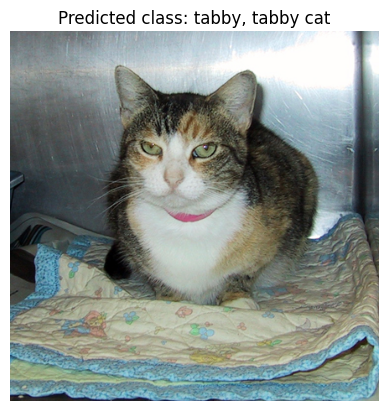

In [15]:
#Imagen de prueba

image = test_dataset["image"][1]

image_processor = PvtImageProcessor.from_pretrained("Zetatech/pvt-tiny-224")
model = PvtForImageClassification.from_pretrained("Zetatech/pvt-tiny-224")

inputs = image_processor(image, return_tensors="pt")

with torch.no_grad():
    logits = model(**inputs).logits

# model predicts one of the 1000 ImageNet classes
predicted_label = logits.argmax(-1).item()
predicted_class = model.config.id2label[predicted_label]


plt.imshow(image)
plt.axis('off')
plt.title(f'Predicted class: {predicted_class}')
plt.show()


In [16]:
torch.set_float32_matmul_precision("medium") # optimizacion

In [17]:
def preprocess_function(examples):
    inputs = image_processor(images=examples['image'], return_tensors="pt", padding=True)
    inputs['labels'] = torch.tensor([0] * len(examples['label']), dtype=torch.float)
    return inputs

def transform(example):
    # Apply feature extractor transforms (resize, normalize, convert to tensor)
    inputs = image_processor(images=example['image'], return_tensors="pt")
    example['pixel_values'] = inputs['pixel_values'].squeeze()  # Remove extra dimension
    example['label'] = example['label']
    return example


In [20]:
#Transformaciones para adecuar dataset a modelo
dataset_train = train_dataset.map(transform)
dataset_test = test_dataset.map(transform)

Map:   0%|          | 0/900 [00:00<?, ? examples/s]

Map:   0%|          | 0/150 [00:00<?, ? examples/s]

In [21]:
dataset_train.set_format(type='torch', columns=['pixel_values', 'label'])
dataset_test.set_format(type='torch', columns=['pixel_values', 'label'])

### Fine tuning
Los parámetros elegidos son:
- Batch size: 16 ya que es un dataset pequeño, y mejora la performance
- Learning rate: 1e-5 para tener un ajuste de los pesos más suave, partiendo de los pesos pre-entrenados
- Epochs: 4
- Weight decay: 0.001 valor bajo de WD es recomendabel para datasets pequeños

In [22]:
import os
os.environ["WANDB_DISABLED"] = "true" # no utilizamos weights and biases

In [24]:
training_args = TrainingArguments(
    output_dir="/content/drive/MyDrive/CEIA/TP3/pvt-finetuned-tp3",
    evaluation_strategy="epoch",
    learning_rate=1e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.001,
    logging_dir='/content/drive/MyDrive/CEIA/TP3/logs',
    log_level = 'info',
    logging_steps = 20,  # Ajusta según la frecuencia deseada
    fp16 = True,
)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = np.mean(preds == labels)
    return {"accuracy": accuracy}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_train,
    eval_dataset=dataset_test,
    #compute_metrics=compute_metrics,
)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1568: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Using auto half precision backend
The following columns in the training set don't have a corresponding argument in `PvtForImageClassification.forward` and have been ignored: image. If image are not expected by `PvtForImageClassification.forward`,  you can safely ignore this mes

Epoch,Training Loss,Validation Loss
1,0.716300,0.137648
2,0.071600,0.094364
3,0.033200,0.062200
4,0.014000,0.062957


The following columns in the evaluation set don't have a corresponding argument in `PvtForImageClassification.forward` and have been ignored: image. If image are not expected by `PvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 150
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `PvtForImageClassification.forward` and have been ignored: image. If image are not expected by `PvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 150
  Batch size = 16
The following columns in the evaluation set don't have a corresponding argument in `PvtForImageClassification.forward` and have been ignored: image. If image are not expected by `PvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 150
  Batch size = 16
Saving model checkpoint to /con

TrainOutput(global_step=228, training_loss=0.40693219901438343, metrics={'train_runtime': 83.2481, 'train_samples_per_second': 43.244, 'train_steps_per_second': 2.739, 'total_flos': 4.30137705037824e+16, 'train_loss': 0.40693219901438343, 'epoch': 4.0})

### Metricas

In [25]:
eval_results = trainer.evaluate()
print(eval_results)

The following columns in the evaluation set don't have a corresponding argument in `PvtForImageClassification.forward` and have been ignored: image. If image are not expected by `PvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Evaluation *****
  Num examples = 150
  Batch size = 16


{'eval_loss': 0.0629568099975586, 'eval_runtime': 3.4038, 'eval_samples_per_second': 44.068, 'eval_steps_per_second': 2.938, 'epoch': 4.0}


In [26]:
torch.cuda.empty_cache() # limpiamos cache

In [27]:
test_loader = DataLoader(dataset_test, batch_size=64)
model = model.to('cuda')

# Evaluate the model on test data
model.eval()  # Set model to evaluation mode
correct = 0
total = 0

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model(pixel_values=pixel_values.to('cuda'))  # Forward pass
        predictions = torch.argmax(outputs.logits, dim=-1)
        correct += (predictions.to('cpu') == batch['label']).sum().item()
        total += batch['label'].size(0)

accuracy = correct / total
print(f"Test Accuracy: {accuracy * 100:.2f}%")

Test Accuracy: 97.33%


In [28]:
test_item = dataset_test[0]

type(test_item['pixel_values'])

torch.Tensor

### Inferencia

In [29]:
def inference_prediction(image: torch.Tensor, clear_cache = False) -> torch.Tensor:
    with torch.no_grad():
        pixel_values = image.squeeze(1).float().unsqueeze(0)
        outputs = model(pixel_values=pixel_values.to(device))
        if clear_cache:
            torch.cuda.empty_cache() # libera memoria de la cache luego de inferencia
        return torch.argmax(outputs.logits, dim=-1)


In [30]:
inference_prediction(test_item['pixel_values']) == test_item["label"]

tensor([True], device='cuda:0')

In [31]:
outputs = trainer.predict(dataset_test)

The following columns in the test set don't have a corresponding argument in `PvtForImageClassification.forward` and have been ignored: image. If image are not expected by `PvtForImageClassification.forward`,  you can safely ignore this message.

***** Running Prediction *****
  Num examples = 150
  Batch size = 16


In [32]:
outputs.metrics

{'test_loss': 0.0629568099975586,
 'test_runtime': 6.4274,
 'test_samples_per_second': 23.337,
 'test_steps_per_second': 1.556}

In [33]:
labels = dataset_train.features['label'].names
labels

['cat', 'dog', 'rabbit']

In [34]:
y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)
y_pred_filtered = np.where(y_pred < len(labels), y_pred, -1)

### Matriz de confusión

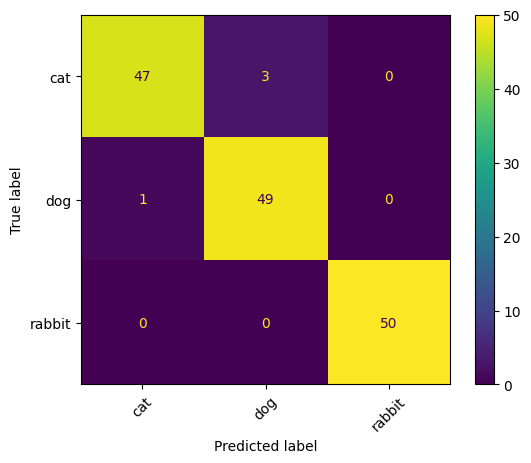

In [35]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = outputs.label_ids
y_pred = outputs.predictions.argmax(1)

#labels = train_dataset.features['label'].names
#labels_ = ["Unknown"] + labels
cm = confusion_matrix(y_true, y_pred_filtered)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(xticks_rotation=45)

## 2

A continuación voy a hacer la inferencia del dataset con el modelo pre-entrenado sin fine-tuning. Por el dataset elegido, tuve que realizar una generalziación de los labels, porque Imagenet tiene labels de razas o tipos específicos de animales, y mi dataset original tiene la clase genérica. De las etiquetas que encontré en Imagenet, consideré algunas para la generalizaición, pero no tomé todas las existenes; por lo que los resultados y métricas, están sujetos a este punto tambipen.

In [62]:
model_2 = PvtForImageClassification.from_pretrained("Zetatech/pvt-tiny-224")
image_processor_2 = PvtImageProcessor.from_pretrained("Zetatech/pvt-tiny-224")



loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--Zetatech--pvt-tiny-224/snapshots/6a44ba96dda6a6f3e2b6913682acfa0071482e83/config.json
Model config PvtConfig {
  "_name_or_path": "Zetatech/pvt-tiny-224",
  "architectures": [
    "PvtForImageClassification"
  ],
  "attention_probs_dropout_prob": 0.0,
  "depths": [
    2,
    2,
    2,
    2
  ],
  "drop_path_rate": 0.0,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.0,
  "hidden_sizes": [
    64,
    128,
    320,
    512
  ],
  "id2label": {
    "0": "tench, Tinca tinca",
    "1": "goldfish, Carassius auratus",
    "2": "great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias",
    "3": "tiger shark, Galeocerdo cuvieri",
    "4": "hammerhead, hammerhead shark",
    "5": "electric ray, crampfish, numbfish, torpedo",
    "6": "stingray",
    "7": "cock",
    "8": "hen",
    "9": "ostrich, Struthio camelus",
    "10": "brambling, Fringilla montifringilla",
    "11": 

### Inferencia

In [63]:


# Mapeo de algunas clases específicas a clases generales
class_mapping = {
    "tabby, tabby cat":"cat",
    "tiger cat":"cat",
    "Persian cat":"cat",
    "Siamese cat, Siamese":"cat",
    "Egyptian cat":"cat",
    "golden retriever": "dog",
    "italian greyhound": "dog",
    "Afghan_hound":"dog",
    "wood rabbit, cottontail, cottontail rabbit": "rabbit",
    "Angora, Angora rabbit": "rabbit",
}

# Función para generalizar las predicciones
def generalize_prediction(pred_idx):
    pred_class = model_2.config.id2label[pred_idx]
    return class_mapping.get(pred_class, pred_class)  # Si no está en el mapeo, devuelve la clase original


In [64]:
labels

['cat', 'dog', 'rabbit']

In [65]:
torch.cuda.empty_cache() # limpiamos cache

In [66]:
test_loader = DataLoader(dataset_test, batch_size=64)
model_2 = model_2.to('cuda')


model_2.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for batch in test_loader:
        pixel_values = batch['pixel_values'].squeeze(1).float()
        outputs = model_2(pixel_values=pixel_values.to('cuda'))
        predictions = torch.argmax(outputs.logits, dim=-1)

        #Generalizo las predicciones
        generalized_preds = [generalize_prediction(pred.item()) for pred in predictions.cpu()]

        all_preds.extend(generalized_preds)
        all_labels.extend([labels[label] for label in batch['label'].cpu().numpy()])


Accuracy: 39.33%


In [75]:
# Calcular la accuracy
accuracy = accuracy_score(all_labels, all_preds_modif)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 39.33%


In [78]:
all_preds

['quilt, comforter, comfort, puff',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'schipperke',
 'cat',
 'cat',
 'cat',
 'Pomeranian',
 'lynx, catamount',
 'cat',
 'cat',
 'cat',
 'cat',
 'papillon',
 'cat',
 'cat',
 'schipperke',
 'dishwasher, dish washer, dishwashing machine',
 'Samoyed, Samoyede',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'cat',
 'toy terrier',
 'cat',
 'cat',
 'cat',
 'cat',
 'schipperke',
 'cat',
 'cat',
 'cat',
 'Samoyed, Samoyede',
 'Siberian husky',
 'cat',
 'Shetland sheepdog, Shetland sheep dog, Shetland',
 'cat',
 'Border collie',
 'Border collie',
 'vizsla, Hungarian pointer',
 'Sussex spaniel',
 'beagle',
 'dog',
 'Chihuahua',
 'Great Dane',
 'dog',
 'American Staffordshire terrier, Staffordshire terrier, American pit bull terrier, pit bull terrier',
 'Staffordshire bullterrier, Staffordshire bull terrier',
 'chow, chow chow',
 'Labrador retriever',
 'Newfoundland, Newfoundland dog',
 'dog',
 'Pomeranian',
 'basset

### Matriz de confusion

Para la matriz de confusión voy a tomar todas las clases "no genericas" y las convierto en "unknown"

In [70]:
all_preds_modif = ['unknown' if pred not in ["cat", "dog", "rabbit"] else pred for pred in all_preds]

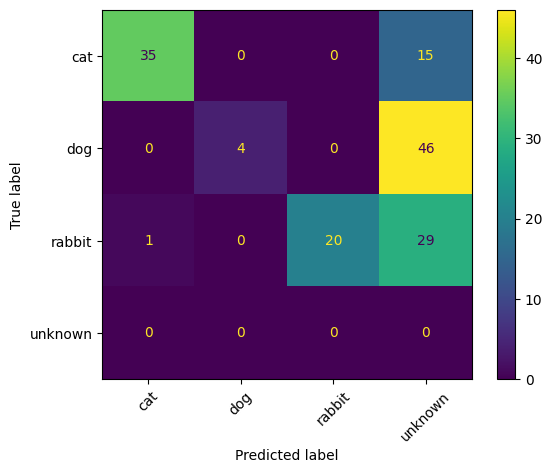

In [77]:
cm = confusion_matrix(all_labels, all_preds_modif, labels=["cat", "dog", "rabbit", "unknown"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["cat", "dog", "rabbit", "unknown"])
disp.plot(xticks_rotation=45)

### Observaciones

Al observar las etiquetas "all_pred", notamos que el modelo no contempla muchas razas de perros/gatos lo que indica que su rendimiento podría haber sido mucho mejor si esas razas hubieran estado incluidas (De hecho hay solo 1 caso de falso positivo entre gato y conejo).

En este caso, como las clases elegidas ya pertenecían a ImageNet (ya fue entrenado con imagenes de perros, gatos y conejos); el modelo sin Fine-tuning perfroma bien (haciendo la salvedad de las razas).

Antes de elegir este dataset, hice pruebas con otros (Fashion-Mnist o datasets de alimentos) pero al tener clases no-incluídas en Imagenet, no pude encontrar formas de evaluar la perfromance, ya que el accuracy era nulo, lo que también afectaba la matriz de confusión; y por eso decidí elegir el dataset actual.

Por lo tanto, para este caso, si bien el fine tuning permitió mejorar las métricas y adecuar el modelo al dataset; puede no ser tan notoria la diferencia como con datasets más variados; donde el fine tuning es indispensable para adecuar el modelo pero tener un equilibrio de costo comutacional y tiempo de entrenamiento.
